# Batch Gradient Descent
1. Use the whole dataset

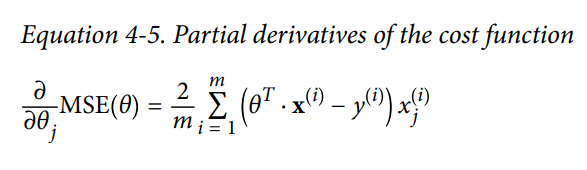

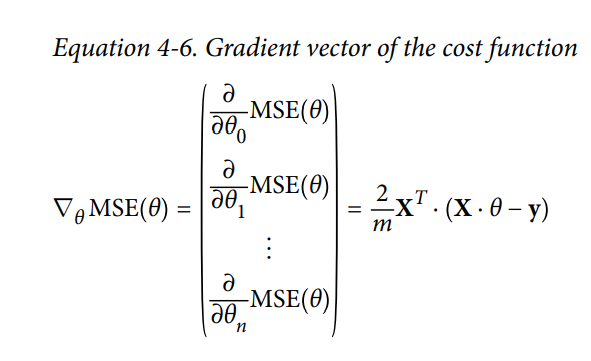

* Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation

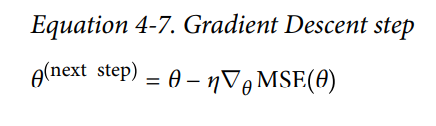



In [8]:
# implementation

import numpy as np
from data_set import get_x_y
X, y = get_x_y()
eta = 0.1
iterations = 100000
m = 100
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instanc
theta = np.random.randn(2, 1)

for iterate in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.11120364],
       [2.96269875]])

In [11]:
theta = np.random.randn(2, 1)

for iterate in range(iterations):
    gradients = 2/m * np.dot(X_b.T, np.dot(X_b, theta) - y)
    theta -= eta * gradients

theta

array([[4.11120364],
       [2.96269875]])

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

#### Convergence Rate
When the cost function is convex and its slope does not change abruptly (as is the
case for the MSE cost function), Batch Gradient Descent with a fixed learning rate
will eventually converge to the optimal solution, but you may have to wait a while: it
can take O(1/ϵ) iterations to reach the optimum within a range of ϵ depending on the
shape of the cost function. If you divide the tolerance by 10 to have a more precise
solution, then the algorithm will have to run about 10 times longer